<a href="https://colab.research.google.com/github/jjian2/bigdata/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EA%B3%BC%EC%A0%9C_09%EC%A1%B0_20231597_%EC%B5%9C%EC%A7%80%EC%95%88_20231598_%EA%B9%80%EC%9A%B1%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **'titanic'공공데이터를 사용해 탐색적 데이터 분석**


!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [9]:
#그래프 한글표시
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

**데이터 불러오기**

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("gender_submission.csv")

In [53]:
!pip install koreanize_matplotlib

**데이터 확인**

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
print(train.shape)  #(891, 12)
print(test.shape)  #(418, 11)

submission.head()

(891, 12)
(418, 11)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


**tranin data, test data의 결측치 확인**

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

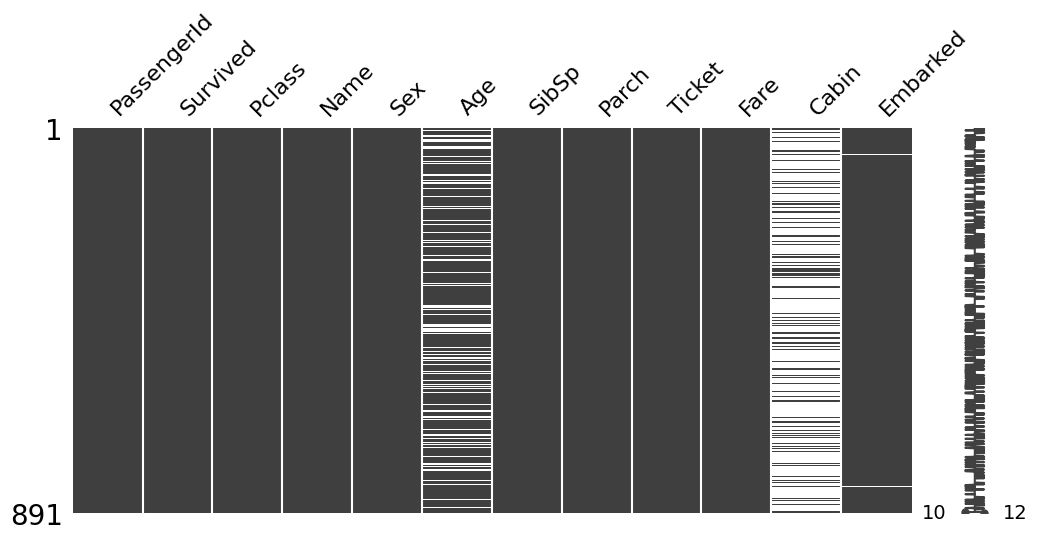

In [54]:
# 결측치 시각화
import missingno as msno
msno.matrix(train,figsize=(12, 5))

<Axes: ylabel='count'>

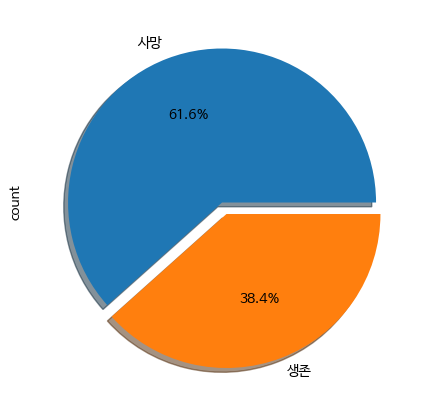

In [10]:
# 생존비율 확인
train["Survived"].value_counts()

plt.figure(figsize=(8, 5))
labels = ['사망', '생존']
train['Survived'].value_counts().plot.pie(explode=[0, 0.08],
                                          shadow=True,
                                          autopct='%1.1f%%',
                                          labels=labels)

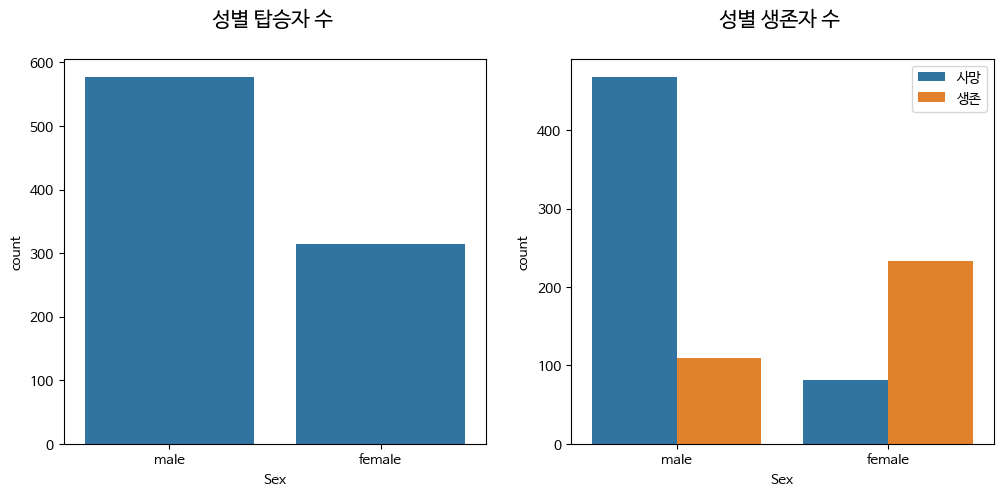

In [11]:
#성별
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].set_title("성별 탑승자 수 \n", size=15)
sns.countplot(x="Sex", data=train, ax=axes[0])

axes[1].set_title("성별 생존자 수 \n", size=15)
sns.countplot(x="Sex", hue="Survived", data=train, ax=axes[1])
axes[1].legend(labels = ['사망', '생존'])

,Survived
Sex,
female,0.742038
male,0.188908


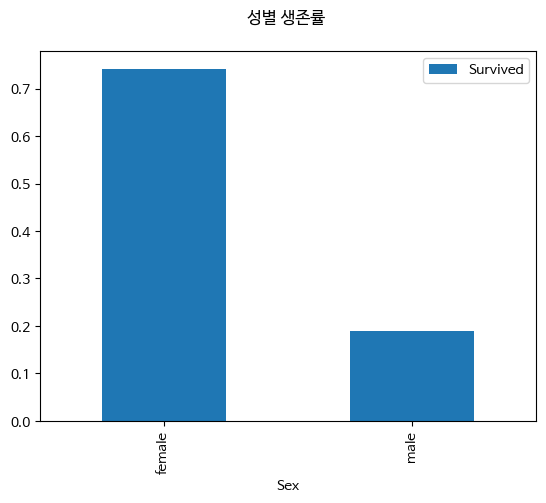

In [12]:
# 성별 생존률
sur = train[['Sex', 'Survived']].groupby('Sex').mean().plot.bar()
sur.set_title("성별 생존률 \n")
train[['Sex', 'Survived']].groupby('Sex').mean()

In [19]:
#티켓클래스별 생존률
train[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


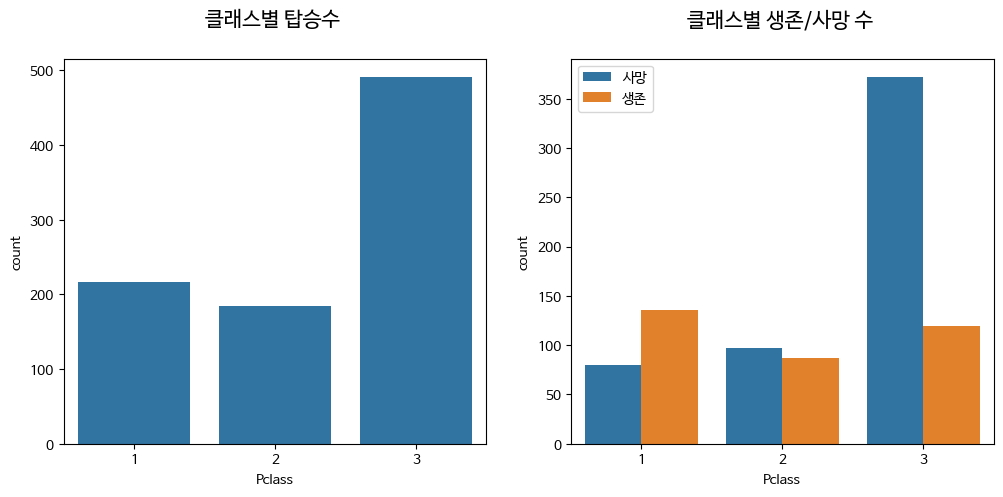

In [20]:
#티켓클래스별 생존률 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].set_title("클래스별 탑승수 \n", size=15)
sns.countplot(data=train, x='Pclass', ax=axes[0])

axes[1].set_title("클래스별 생존/사망 수 \n", size=15)
sns.countplot(x="Pclass", hue="Survived", data=train, ax=axes[1])
axes[1].legend(labels = ['사망', '생존'])

Text(0.5, 1.0, 'class별 생존률')

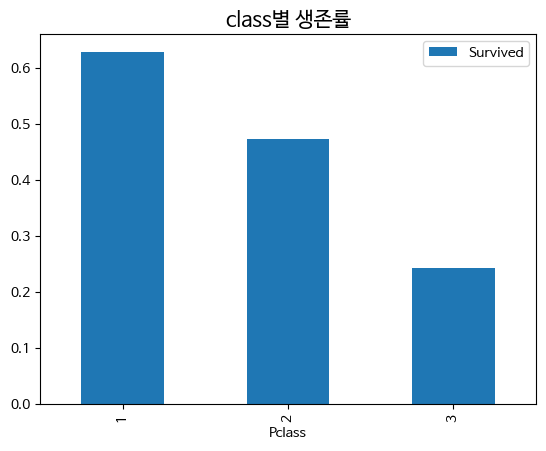

In [13]:
# class별 생존률
sur = train[['Pclass', 'Survived']].groupby(['Pclass']).mean().plot.bar()
sur.set_title('class별 생존률', size=15)

In [14]:
#나이
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<ipython-input-21-1f50975d934e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'], bins=25)


<Axes: xlabel='Age', ylabel='Density'>

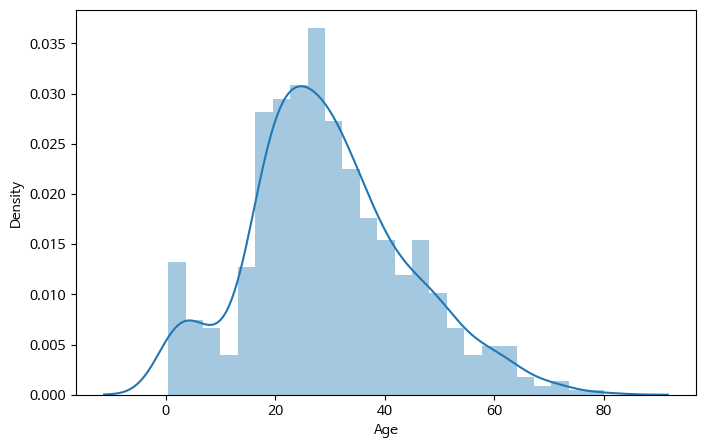

In [21]:
plt.figure(figsize=(8, 5))
sns.distplot(train['Age'], bins=25)

<Axes: xlabel='Age', ylabel='Density'>

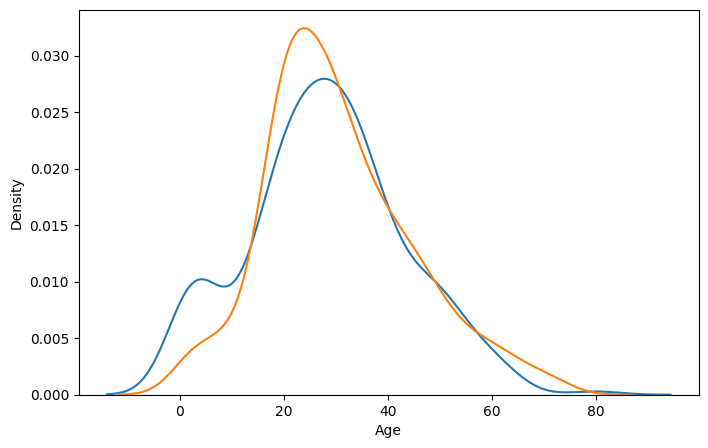

In [41]:
#생존/사망 탑승객 비교
sur = train[train['Survived'] == 1]
dead = train[train['Survived'] == 0]

plt.figure(figsize=(8, 5))
sns.distplot(sur['Age'], bins=25, hist=False)
sns.distplot(dead['Age'], bins=25, hist=False)

<ipython-input-16-9528ded0cd6d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="SibSp", data=train, ax=axes[0][0], palette="Set2")
<ipython-input-16-9528ded0cd6d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Parch", data=train, ax=axes[0][1], palette="Set2")


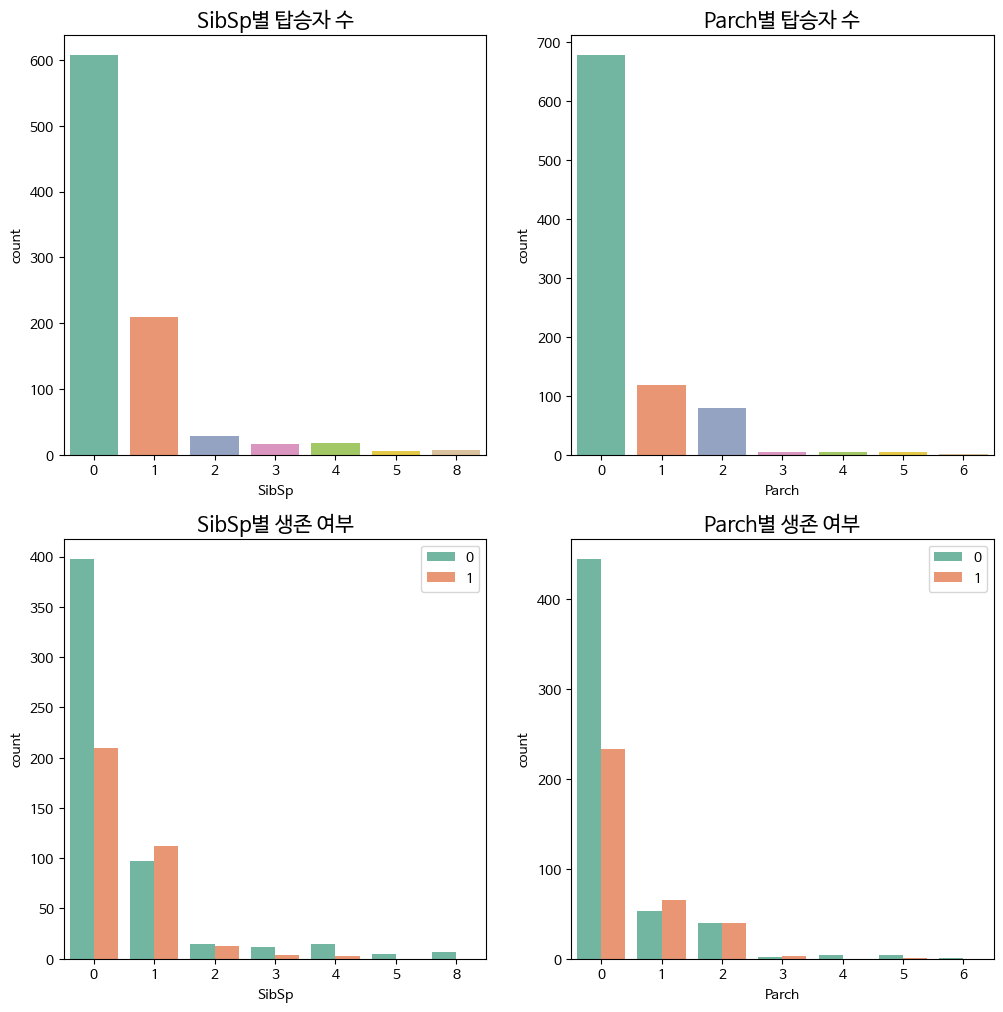

In [16]:
#함께 탑승한 가족의 수 생존율
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0][0].set_title("SibSp별 탑승자 수", size=15)
sns.countplot(x="SibSp", data=train, ax=axes[0][0], palette="Set2")
axes[0][1].set_title("Parch별 탑승자 수", size=15)
sns.countplot(x="Parch", data=train, ax=axes[0][1], palette="Set2")

axes[1][0].set_title("SibSp별 생존 여부", size=15)
sns.countplot(x="SibSp", hue="Survived", data=train, ax=axes[1][0], palette="Set2")
axes[1][0].legend(loc='upper right')
axes[1][1].set_title("Parch별 생존 여부", size=15)
sns.countplot(x="Parch", hue="Survived", data=train, ax=axes[1][1], palette="Set2")
axes[1][1].legend(loc='upper right')

In [ ]:
#SibSp, Parch별로 생존률
train[['SibSp', 'Survived']].groupby(['SibSp']).mean()
train[['Parch', 'Survived']].groupby(['Parch']).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


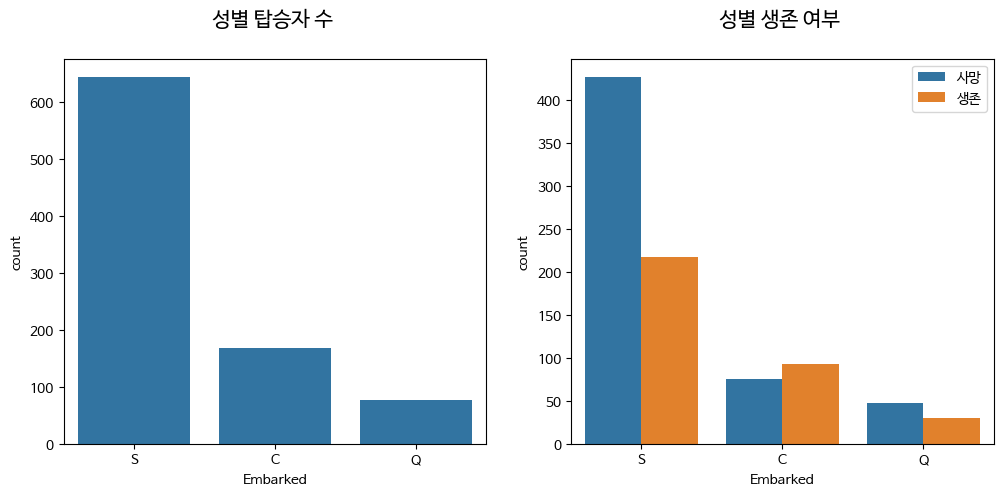

In [17]:
#탑승 항구
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].set_title("성별 탑승자 수 \n", size=15)
sns.countplot(x="Embarked", data=train, ax=axes[0])

axes[1].set_title("성별 생존 여부 \n", size=15)
sns.countplot(x="Embarked", hue="Survived", data=train, ax=axes[1])
axes[1].legend(labels = ['사망', '생존'])

In [ ]:
#항구별 사망 비율
train[['Embarked', 'Survived']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


<Axes: >

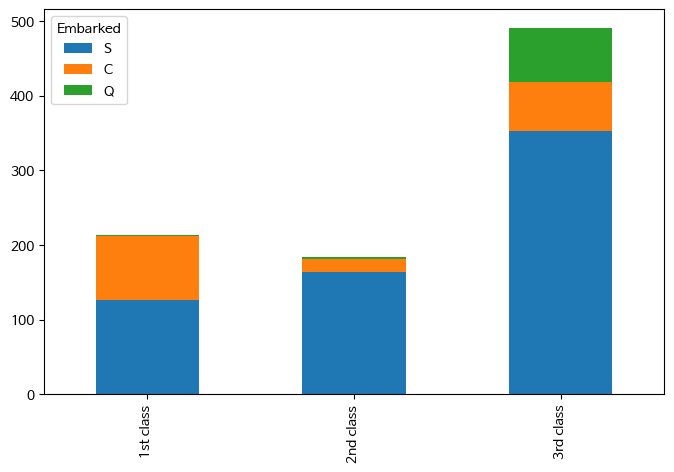

In [18]:
#할구별 탑승객들의 티켓 클래스
pc1 = train[train['Pclass'] == 1]['Embarked'].value_counts()
pc2 = train[train['Pclass'] == 2]['Embarked'].value_counts()
pc3 = train[train['Pclass'] == 3]['Embarked'].value_counts()
pc = pd.DataFrame([pc1, pc2, pc3])
pc.index = ['1st class', '2nd class', '3rd class']

fig, ax = plt.subplots(figsize=(8, 5))
pc.plot(kind='bar', stacked=True, ax=ax)

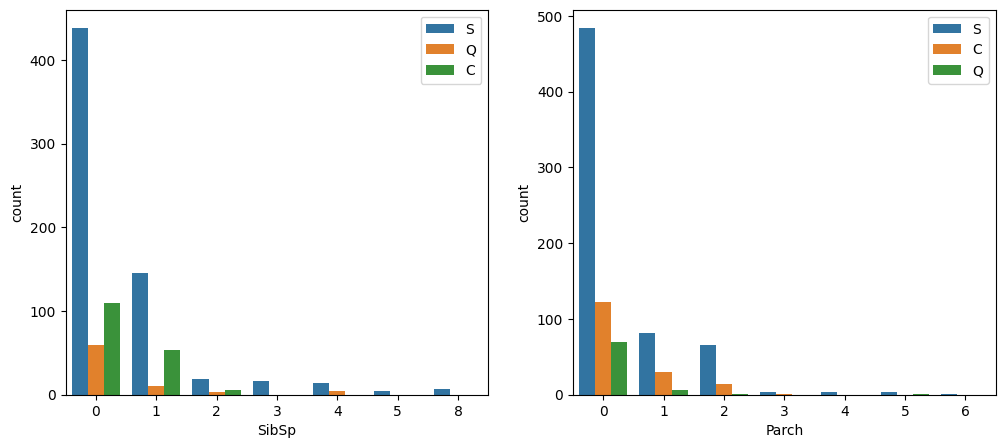

In [45]:
#항구별 탑승객들의 동승자
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=train, x='SibSp', hue='Embarked', ax=ax[0])
sns.countplot(data=train, x='Parch', hue='Embarked', ax=ax[1])
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
plt.show()

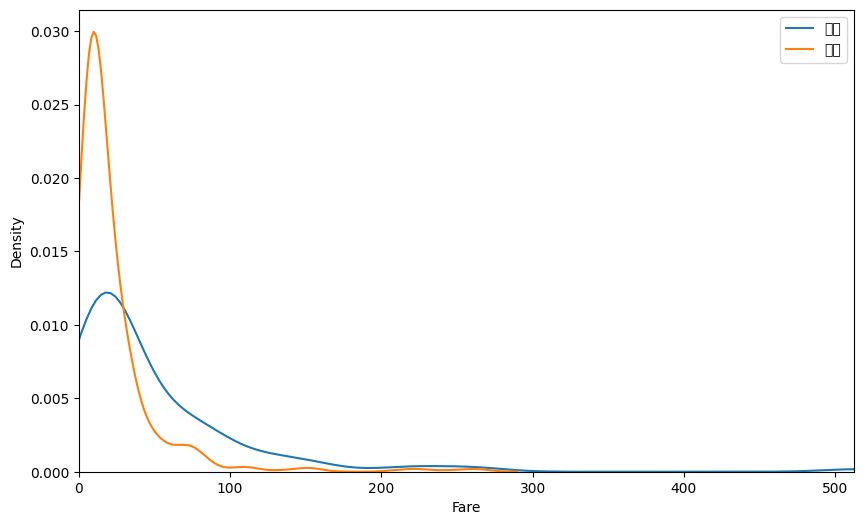

In [46]:
#탑승 금액
fig, ax = plt.subplots(figsize=(10,6))

# 분포 확인
sns.kdeplot(train[train['Survived']==1]['Fare'], ax=ax)
sns.kdeplot(train[train['Survived']==0]['Fare'], ax=ax)

# 축 범위
ax.set(xlim=(0, train['Fare'].max()))
ax.legend(['생존', '사망'])

plt.show()

In [47]:
train.columns
# Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
#        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype='object')

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# **자유 선택으로 선정한 공공데이터를 사용해 탐색적 데이터 분석**

 **데이터 불러오기**

In [71]:
subway = pd.read_csv("서울시 지하철 호선 별 역별 시간대별 승하차 인원정보.csv")

In [72]:
subway

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202404,1호선,동대문,708,7,11309,2206,9917,7632,16477,...,9476,693,3153,0,266,0,0,0,0,20240503
1,202404,1호선,동묘앞,231,1,3091,802,4051,5422,9024,...,4900,151,2459,2,322,0,0,0,0,20240503
2,202404,1호선,서울역,658,24,8560,9158,14541,62765,43682,...,14443,3203,3771,3,263,0,0,0,0,20240503
3,202404,1호선,시청,94,2,2321,5550,4123,26788,7965,...,4110,661,1172,3,40,1,0,0,0,20240503
4,202404,1호선,신설동,371,25,8785,2166,10319,9477,22808,...,9376,423,3048,0,0,0,0,0,0,20240503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66202,201501,중앙선,운길산,0,0,177,56,642,403,1292,...,633,3,222,0,0,0,0,0,0,20151223
66203,201501,중앙선,원덕,1,0,292,4,415,46,537,...,383,3,157,0,0,0,0,0,0,20151223
66204,201501,중앙선,중랑,14,1,4929,424,8539,2084,22160,...,6501,86,1617,0,0,0,0,0,0,20151223
66205,201501,중앙선,팔당,0,0,161,50,368,149,1227,...,336,8,85,0,0,0,0,0,0,20151223


In [73]:
subway.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202404,1호선,동대문,708,7,11309,2206,9917,7632,16477,...,9476,693,3153,0,266,0,0,0,0,20240503
1,202404,1호선,동묘앞,231,1,3091,802,4051,5422,9024,...,4900,151,2459,2,322,0,0,0,0,20240503
2,202404,1호선,서울역,658,24,8560,9158,14541,62765,43682,...,14443,3203,3771,3,263,0,0,0,0,20240503
3,202404,1호선,시청,94,2,2321,5550,4123,26788,7965,...,4110,661,1172,3,40,1,0,0,0,20240503
4,202404,1호선,신설동,371,25,8785,2166,10319,9477,22808,...,9376,423,3048,0,0,0,0,0,0,20240503


In [74]:
subway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66207 entries, 0 to 66206
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           66207 non-null  int64 
 1   호선명           66207 non-null  object
 2   지하철역          66207 non-null  object
 3   04시-05시 승차인원  66207 non-null  int64 
 4   04시-05시 하차인원  66207 non-null  int64 
 5   05시-06시 승차인원  66207 non-null  int64 
 6   05시-06시 하차인원  66207 non-null  int64 
 7   06시-07시 승차인원  66207 non-null  int64 
 8   06시-07시 하차인원  66207 non-null  int64 
 9   07시-08시 승차인원  66207 non-null  int64 
 10  07시-08시 하차인원  66207 non-null  int64 
 11  08시-09시 승차인원  66207 non-null  int64 
 12  08시-09시 하차인원  66207 non-null  int64 
 13  09시-10시 승차인원  66207 non-null  int64 
 14  09시-10시 하차인원  66207 non-null  int64 
 15  10시-11시 승차인원  66207 non-null  int64 
 16  10시-11시 하차인원  66207 non-null  int64 
 17  11시-12시 승차인원  66207 non-null  int64 
 18  11시-12시 하차인원  66207 non-null  int64 
 19  12시-

**데이터 확인**

In [75]:
subway.sort_values(['사용월'])

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
66206,201501,중앙선,회기,436,3,10929,3067,23317,10430,65043,...,35702,767,9314,0,0,0,0,0,0,20151223
65829,201501,6호선,광흥창,1,0,2855,1423,6602,8582,16395,...,7839,564,2131,0,2,0,0,0,0,20151223
65830,201501,6호선,구산,3,0,4180,149,9486,2160,28761,...,7843,280,2813,0,1,0,0,0,0,20151223
65831,201501,6호선,녹사평(용산구청),4,0,1455,581,2130,4001,5529,...,4432,741,1301,0,0,0,0,0,0,20151223
65832,201501,6호선,대흥,1,0,2276,717,5207,3188,13663,...,7913,638,2013,2,11,0,0,0,0,20151223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,202404,경의선,서강대,1,0,589,128,1806,1503,3297,...,1387,22,200,0,0,0,0,0,0,20240503
410,202404,경의선,백마,228,1,5838,915,18024,6766,38761,...,10829,96,1370,0,0,0,0,0,0,20240503
409,202404,경의선,문산,1148,3,3079,9,8133,2960,17116,...,4942,0,2596,0,0,0,0,0,0,20240503
416,202404,경의선,운정,77,0,5241,794,23700,8996,36428,...,7586,104,1927,0,0,0,0,0,0,20240503


In [76]:
subway.sort_values(['호선명'])

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202404,1호선,동대문,708,7,11309,2206,9917,7632,16477,...,9476,693,3153,0,266,0,0,0,0,20240503
58471,201602,1호선,종로3가,136,4,4301,1930,4017,10914,6206,...,5882,2771,2560,45,100,1,2,0,0,20160308
58470,201602,1호선,종각,85,9,3845,4342,4841,22121,7896,...,5531,4800,1461,19,25,0,0,0,0,20160308
58469,201602,1호선,제기동,184,6,3585,2142,7483,8906,19607,...,7521,239,1780,2,26,0,0,0,0,20160308
58468,201602,1호선,신설동,170,4,5920,1984,8207,7467,18615,...,9882,499,2242,14,27,0,0,0,0,20160308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50552,201705,중앙선,도심,2,1,1863,396,5800,1499,15084,...,2357,37,1155,1,1,0,0,0,0,20170603
50551,201705,중앙선,도농,241,3,7899,1524,17617,4923,41590,...,15526,316,4185,0,0,0,0,0,0,20170603
50550,201705,중앙선,덕소,1257,5,4106,819,10756,2313,28868,...,10202,174,5462,0,0,0,0,0,0,20170603
50556,201705,중앙선,아신,3,1,553,44,1106,385,2363,...,1182,9,494,0,0,0,0,0,0,20170603


In [77]:
subway.sort_values(['지하철역'])

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
44139,201804,우이신설선,4.19민주묘지,7,1,1321,179,3049,1296,7147,...,3013,146,922,0,7,0,0,0,0,20180503
25663,202011,우이신설선,4.19민주묘지,2,0,1324,121,2785,718,6854,...,1956,0,3,0,0,1,0,0,0,20201203
4901,202309,우이신설선,4.19민주묘지,7,0,1590,643,3408,1309,8720,...,2622,90,659,0,0,0,0,0,0,20231003
29862,202004,우이신설선,4.19민주묘지,1,0,982,151,2392,690,5773,...,1773,0,1,0,0,0,0,0,0,20200503
42372,201807,우이신설선,4.19민주묘지,16,1,1584,415,3187,1536,7894,...,2814,126,769,0,7,0,0,0,0,20180803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44491,201803,9호선,흑석(중앙대입구),20,2,3837,1838,6702,10467,17250,...,10521,1826,3103,0,145,0,0,0,0,20180403
12012,202209,9호선,흑석(중앙대입구),4,0,3395,1261,6149,6225,16475,...,7440,1198,1913,0,24,0,0,0,0,20221003
32602,201911,9호선,흑석(중앙대입구),9,1,3703,965,6152,4973,17741,...,11617,1669,3620,1,69,0,0,0,0,20191203
13243,202207,9호선,흑석(중앙대입구),11,0,3610,1368,6470,6529,16586,...,7246,471,1621,0,8,0,0,0,0,20220803


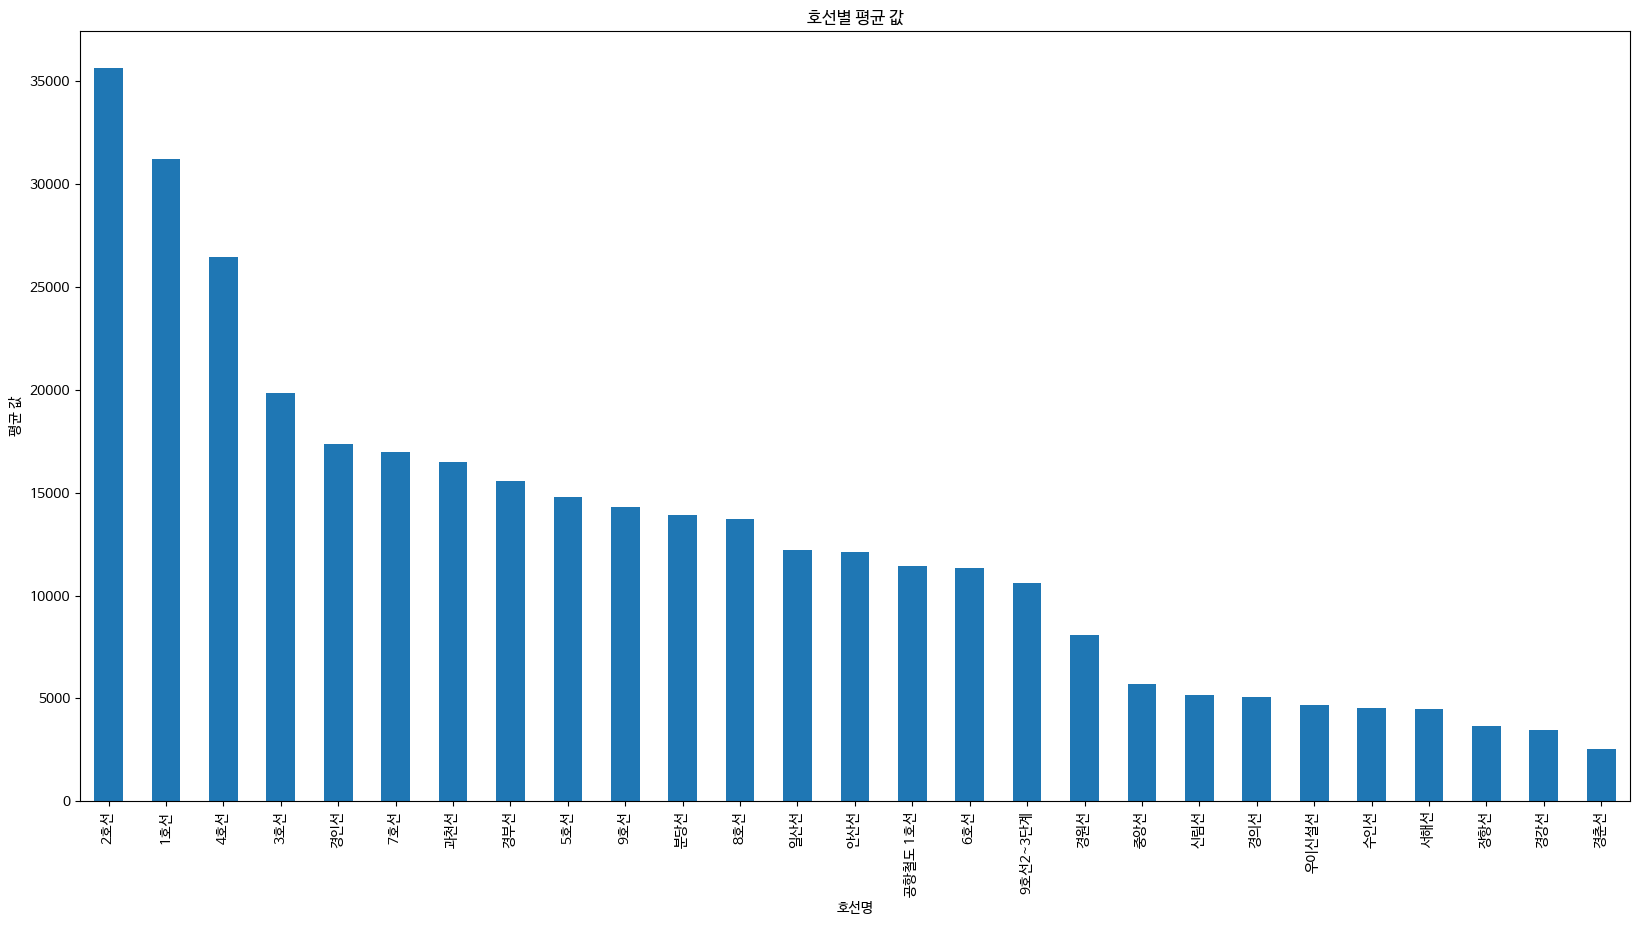

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# 예제 데이터셋 (metro_recent 데이터셋이 이미 로드되어 있다고 가정합니다)
# metro_recent = pd.read_csv('path_to_metro_recent.csv')

# 숫자 열만 선택하여 그룹화 및 평균 계산
numeric_columns = metro_recent.select_dtypes(include='number').columns
subway_line = metro_recent.groupby('호선명')[numeric_columns].mean().reset_index()

# '사용월' 열이 존재한다면 삭제
if '사용월' in subway_line.columns:
    subway_line = subway_line.drop(columns='사용월')

# 인덱스를 '호선명'으로 설정하고 행 단위로 평균 계산 및 정렬
subway_line = subway_line.set_index('호선명').mean(axis=1).sort_values(ascending=False)

# 그래프 그리기
plt.figure(figsize=(20, 10))
subway_line.plot(kind='bar')
plt.xlabel('호선명')
plt.ylabel('평균 값')
plt.title('호선별 평균 값')
plt.show()


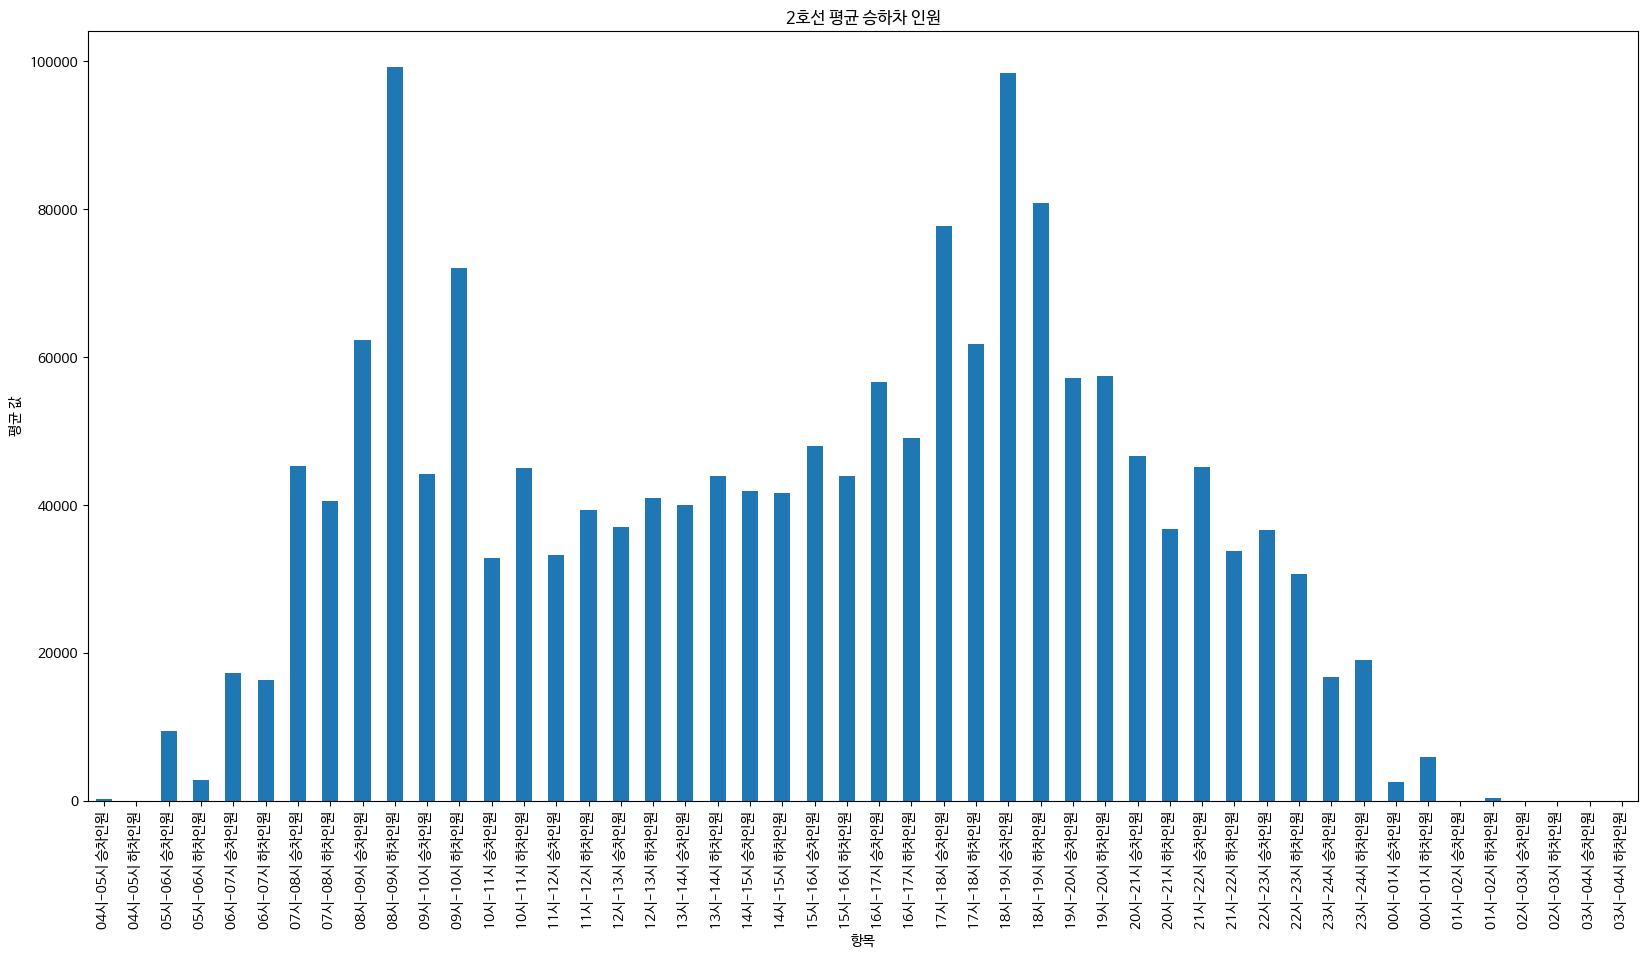

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

# 예제 데이터셋 (metro_recent 데이터셋이 이미 로드되어 있다고 가정합니다)
# metro_recent = pd.read_csv('path_to_metro_recent.csv')

# '2호선' 데이터를 필터링
line_2_data = metro_recent[metro_recent['호선명'] == '2호선']

# 사용월을 인덱스에서 제거
line_2_data = line_2_data.reset_index(drop=True)

# '사용월' 열 제거
line_2_data = line_2_data.drop(columns='사용월', errors='ignore')  # '사용월' 열이 없는 경우 무시

# 숫자 열만 선택하여 평균 계산
numeric_columns = line_2_data.select_dtypes(include='number').columns
line_2_mean = line_2_data[numeric_columns].mean()

# 그래프 그리기
plt.figure(figsize=(20, 10))
line_2_mean.plot(kind='bar')
plt.xlabel('항목')
plt.ylabel('평균 값')
plt.title('2호선 평균 승하차 인원')
plt.show()



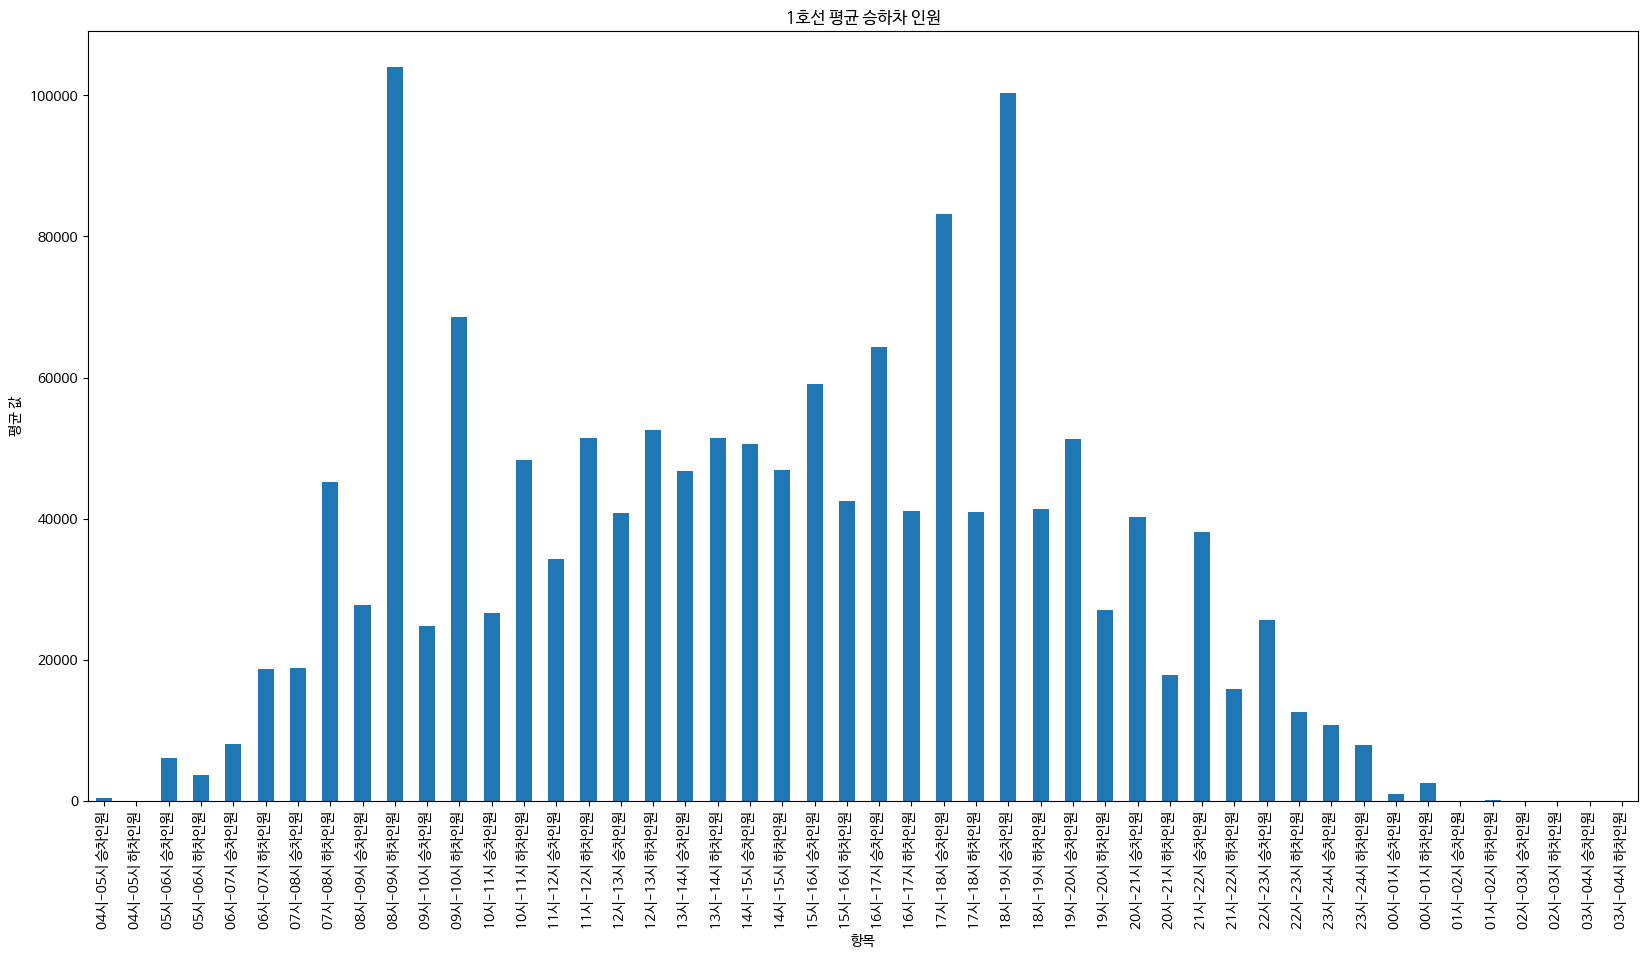

In [111]:
# 예제 데이터셋 (metro_recent 데이터셋이 이미 로드되어 있다고 가정합니다)
# metro_recent = pd.read_csv('path_to_metro_recent.csv')

# '1호선' 데이터를 필터링
line_1_data = metro_recent[metro_recent['호선명'] == '1호선']

# 사용월을 인덱스에서 제거
line_1_data = line_1_data.reset_index(drop=True)

# '사용월' 열 제거
line_1_data = line_1_data.drop(columns='사용월', errors='ignore')  # '사용월' 열이 없는 경우 무시

# 숫자 열만 선택하여 평균 계산
numeric_columns = line_1_data.select_dtypes(include='number').columns
line_1_mean = line_1_data[numeric_columns].mean()

# 그래프 그리기
plt.figure(figsize=(20, 10))
line_1_mean.plot(kind='bar')
plt.xlabel('항목')
plt.ylabel('평균 값')
plt.title('1호선 평균 승하차 인원')
plt.show()

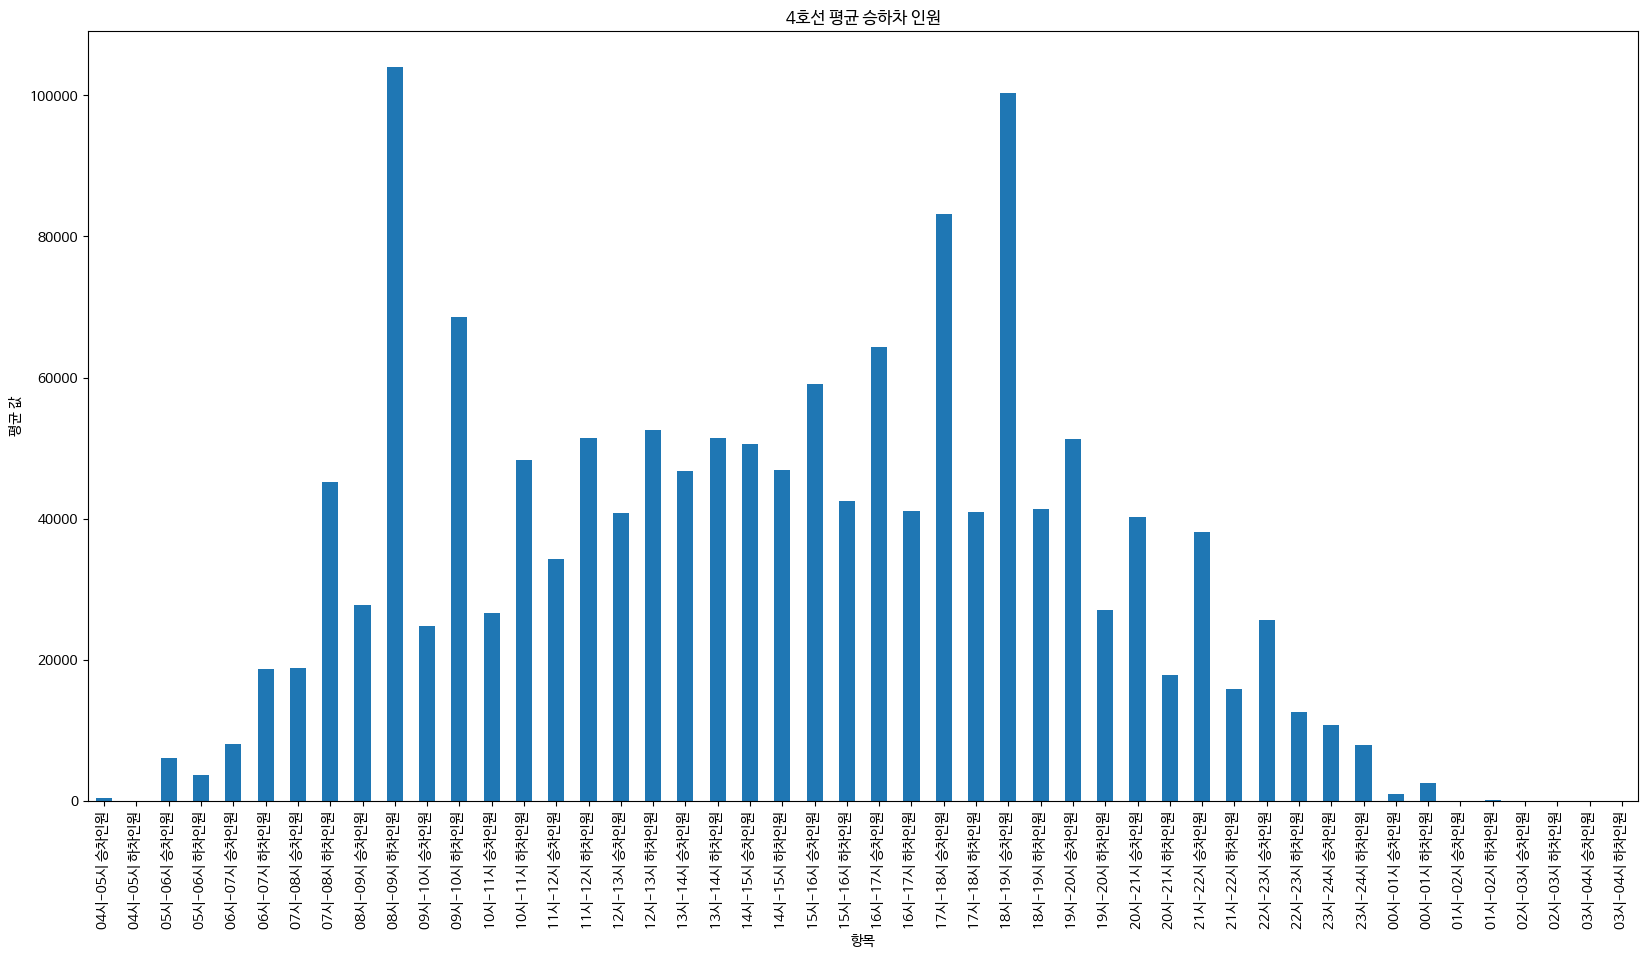

In [162]:
line_4_data = metro_recent[metro_recent['호선명'] == '4호선']

line_4_data = line_4_data.reset_index(drop=True)

line_4_data = line_4_data.drop(columns='사용월', errors='ignore')  # '사용월' 열이 없는 경우 무시

numeric_columns = line_4_data.select_dtypes(include='number').columns
line_4_mean = line_4_data[numeric_columns].mean()

plt.figure(figsize=(20, 10))
line_1_mean.plot(kind='bar')
plt.xlabel('항목')
plt.ylabel('평균 값')
plt.title('4호선 평균 승하차 인원')
plt.show()

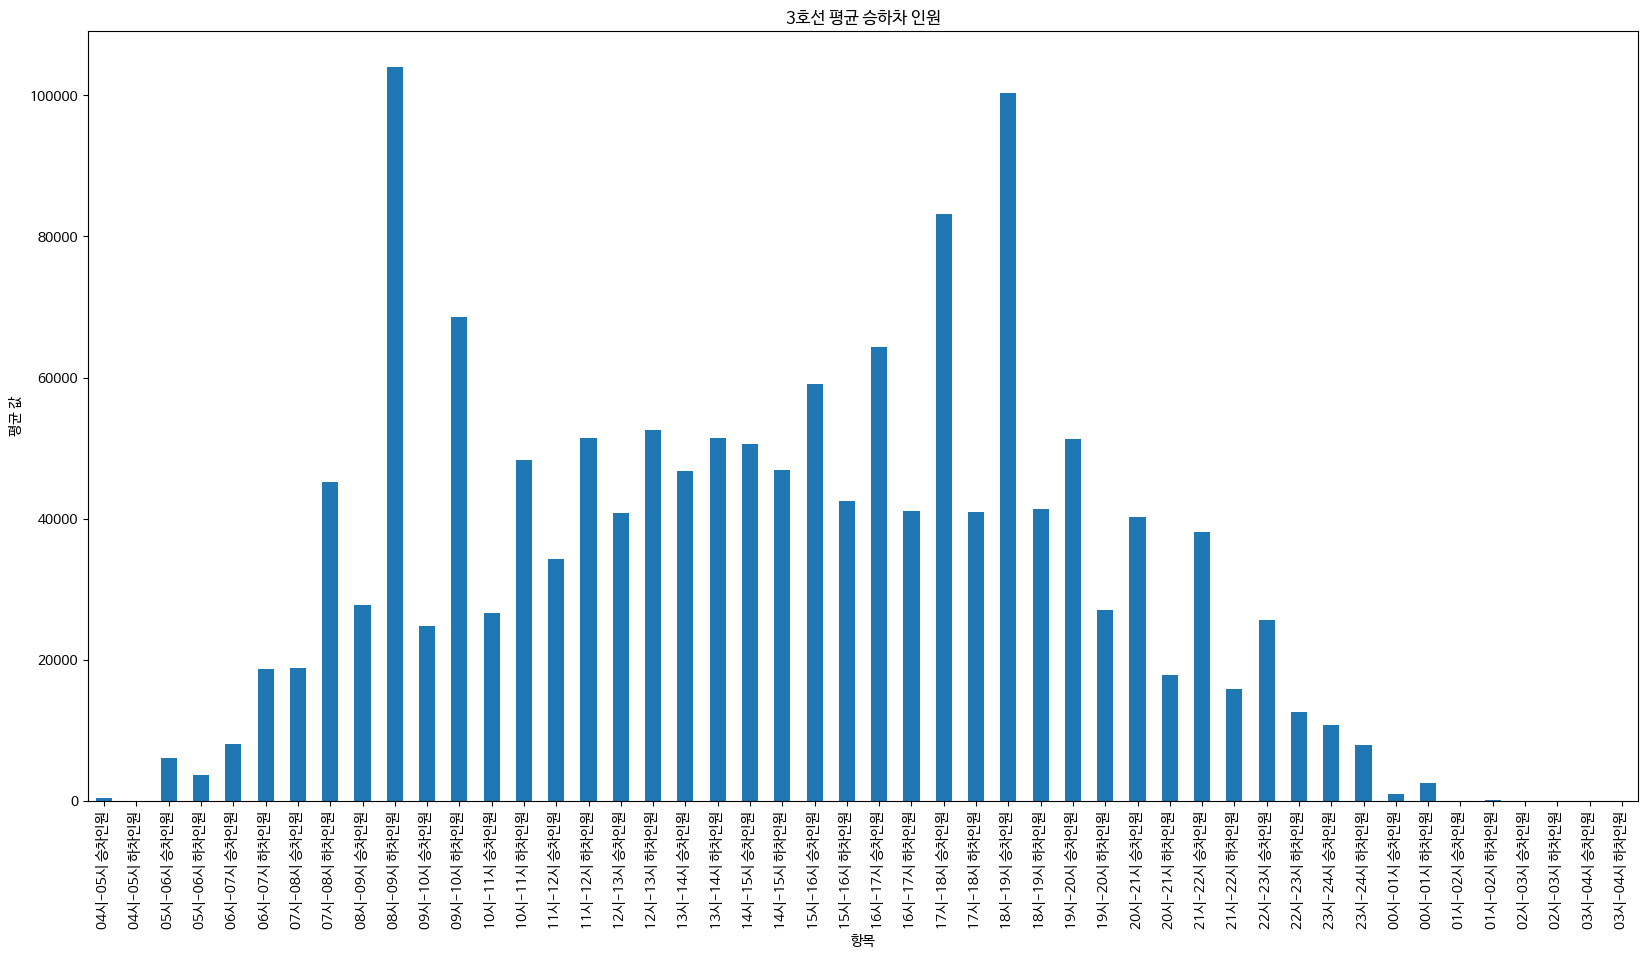

In [161]:
line_3_data = metro_recent[metro_recent['호선명'] == '3호선']

line_3_data = line_3_data.reset_index(drop=True)

line_3_data = line_3_data.drop(columns='사용월', errors='ignore')  # '사용월' 열이 없는 경우 무시

numeric_columns = line_3_data.select_dtypes(include='number').columns
line_3_mean = line_3_data[numeric_columns].mean()

plt.figure(figsize=(20, 10))
line_1_mean.plot(kind='bar')
plt.xlabel('항목')
plt.ylabel('평균 값')
plt.title('3호선 평균 승하차 인원')
plt.show()

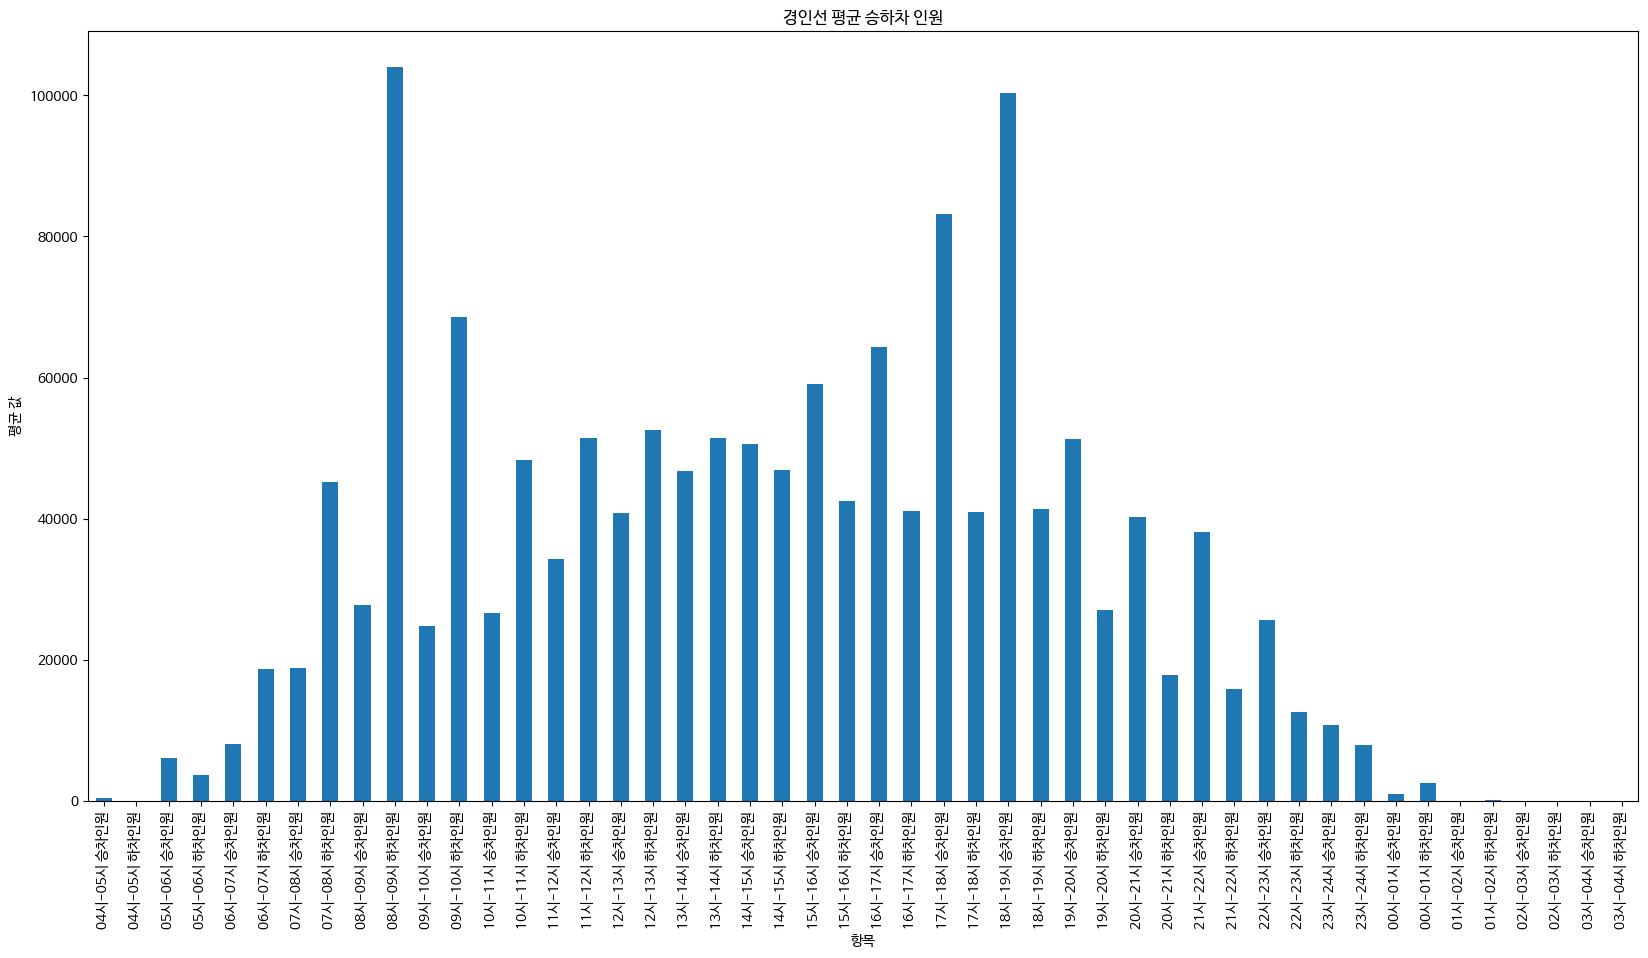

In [163]:
line_경인선_data = metro_recent[metro_recent['호선명'] == '경인선']

line_경인선_data = line_경인선_data.reset_index(drop=True)

line_경인선_data = line_경인선_data.drop(columns='사용월', errors='ignore')  # '사용월' 열이 없는 경우 무시

numeric_columns = line_경인선_data.select_dtypes(include='number').columns
line_경인선_mean = line_경인선_data[numeric_columns].mean()

plt.figure(figsize=(20, 10))
line_1_mean.plot(kind='bar')
plt.xlabel('항목')
plt.ylabel('평균 값')
plt.title('경인선 평균 승하차 인원')
plt.show()

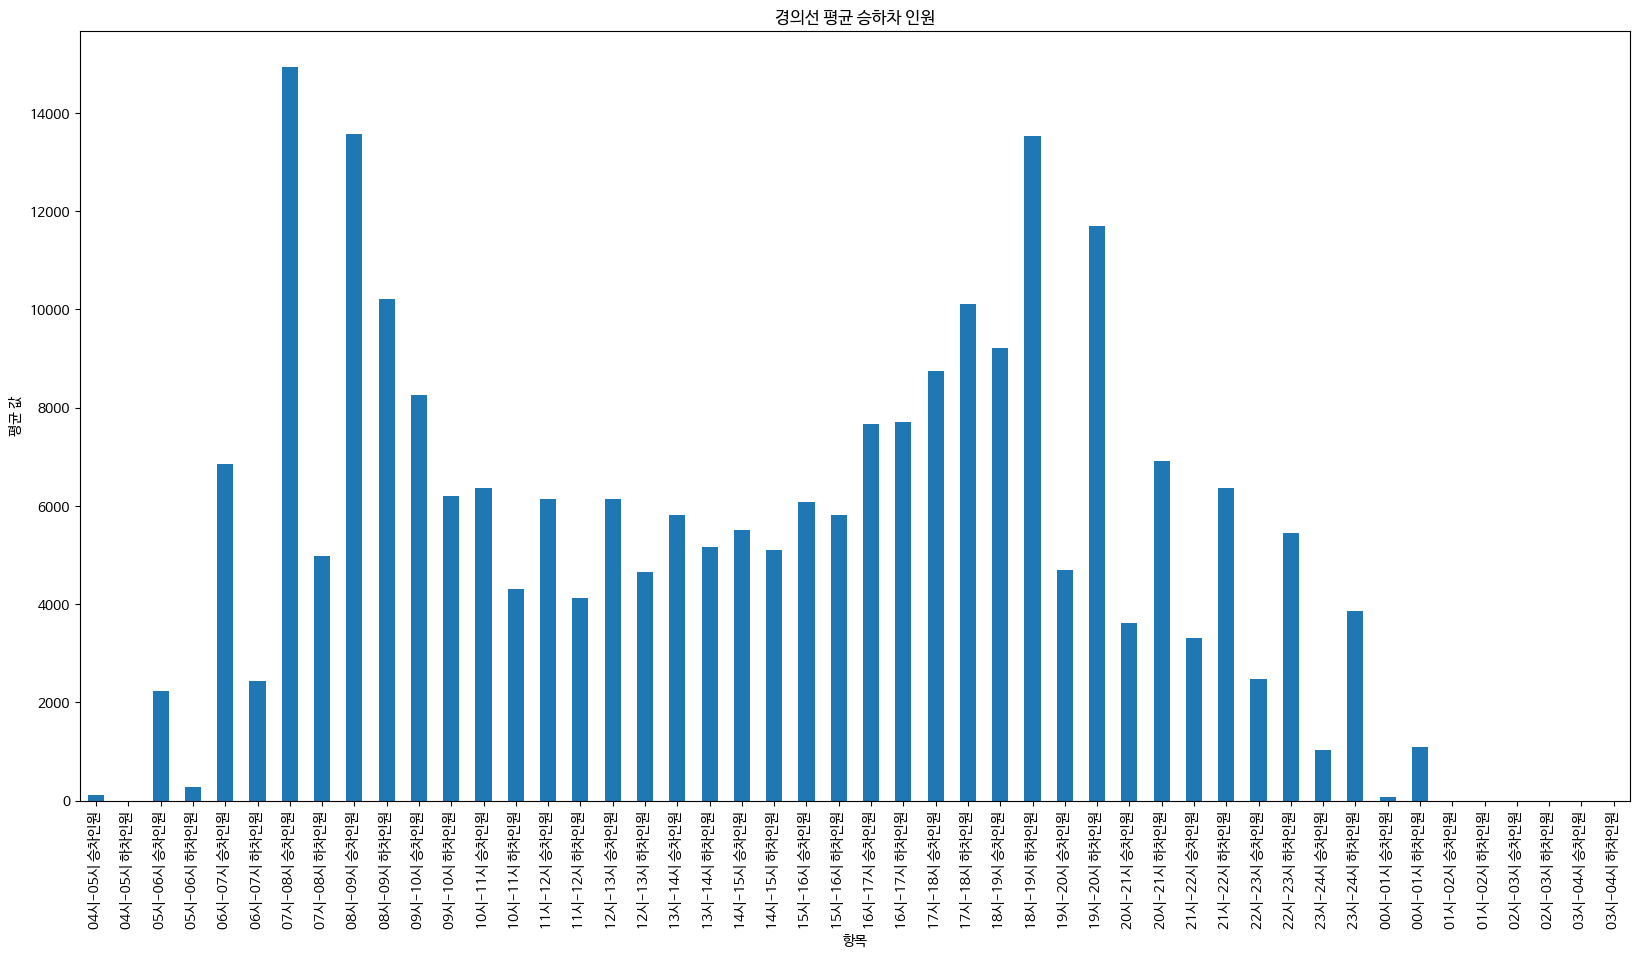

In [113]:
# 예제 데이터셋 (metro_recent 데이터셋이 이미 로드되어 있다고 가정합니다)
# metro_recent = pd.read_csv('path_to_metro_recent.csv')

# '경의선' 데이터를 필터링
line_경의선_data = metro_recent[metro_recent['호선명'] == '경의선']

# 사용월을 인덱스에서 제거
line_경의선_data = line_경의선_data.reset_index(drop=True)

# '사용월' 열 제거
line_경의선_data = line_경의선_data.drop(columns='사용월', errors='ignore')  # '사용월' 열이 없는 경우 무시

# 숫자 열만 선택하여 평균 계산
numeric_columns = line_경의선_data.select_dtypes(include='number').columns
line_경의선_mean = line_경의선_data[numeric_columns].mean()

# 그래프 그리기
plt.figure(figsize=(20, 10))
line_경의선_mean.plot(kind='bar')
plt.xlabel('항목')
plt.ylabel('평균 값')
plt.title('경의선 평균 승하차 인원')
plt.show()

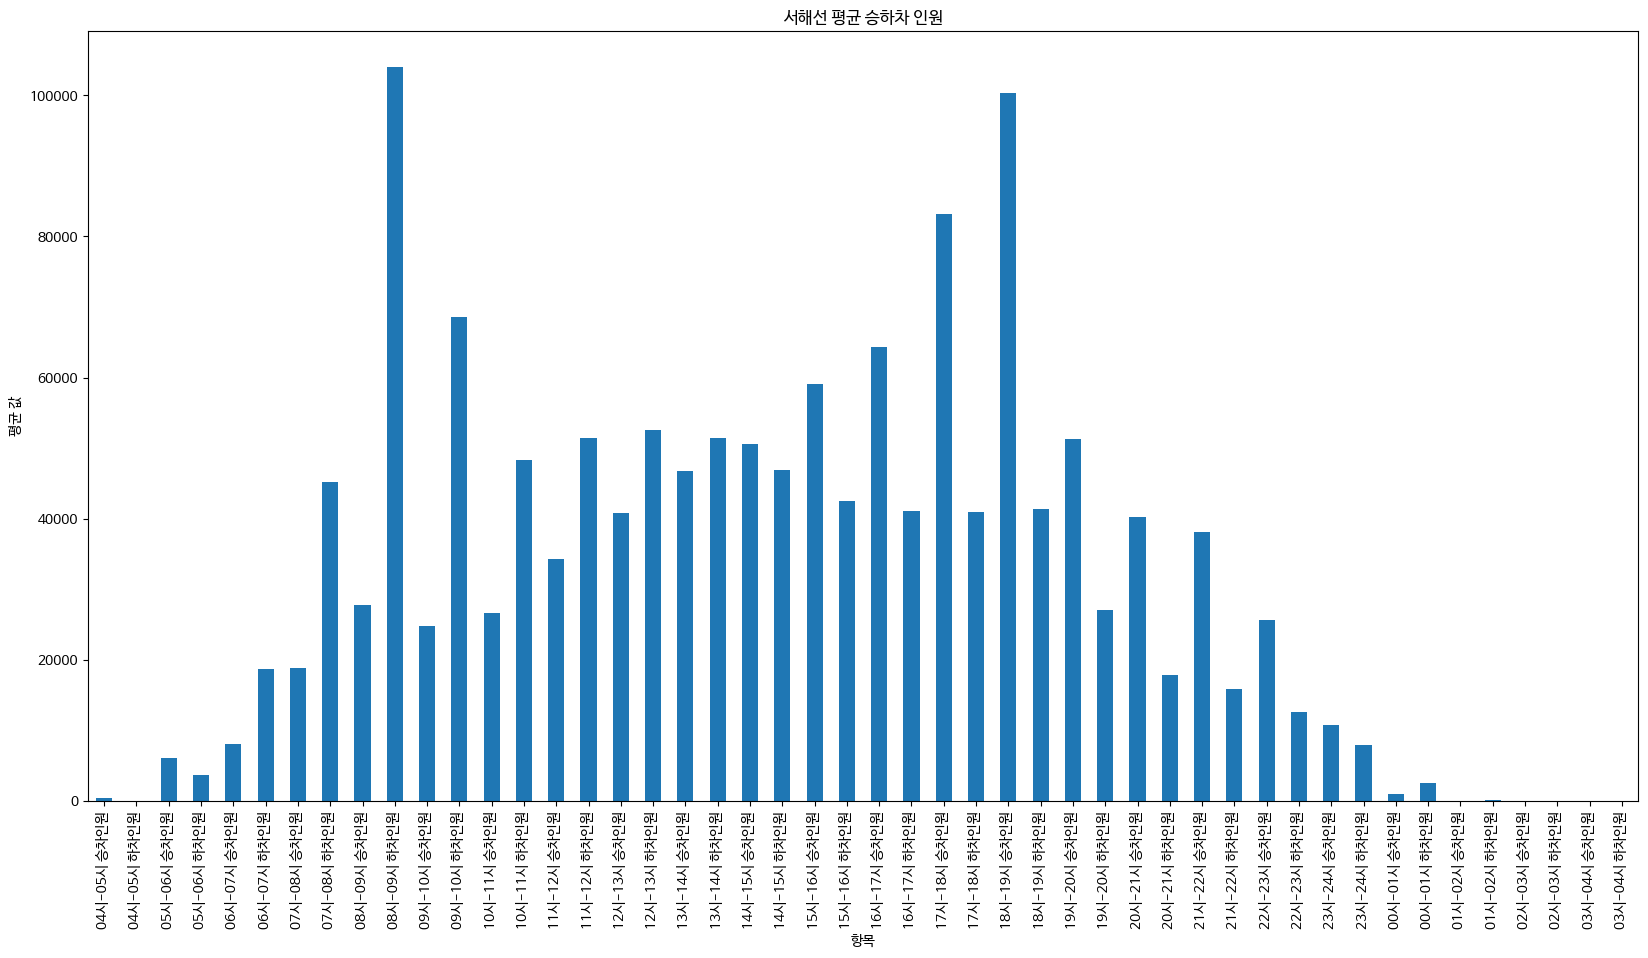

In [164]:
line_서해선_data = metro_recent[metro_recent['호선명'] == '서해선']

line_서해선_data = line_서해선_data.reset_index(drop=True)

line_서해선_data = line_서해선_data.drop(columns='사용월', errors='ignore')  # '사용월' 열이 없는 경우 무시

numeric_columns = line_1_data.select_dtypes(include='number').columns
line_서해선_mean = line_1_data[numeric_columns].mean()

plt.figure(figsize=(20, 10))
line_1_mean.plot(kind='bar')
plt.xlabel('항목')
plt.ylabel('평균 값')
plt.title('서해선 평균 승하차 인원')
plt.show()